# Overview

The shelter wants a model that detects animals that require more help finding a home.

In [121]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

%matplotlib inline

In [563]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

# Exploratory Data Analysis

In [93]:
print len(train.columns), sorted(train.columns)
print len(test.columns), sorted(test.columns)

10 ['AgeuponOutcome', 'AnimalID', 'AnimalType', 'Breed', 'Color', 'DateTime', 'Name', 'OutcomeSubtype', 'OutcomeType', 'SexuponOutcome']
8 ['AgeuponOutcome', 'AnimalType', 'Breed', 'Color', 'DateTime', 'ID', 'Name', 'SexuponOutcome']


In [96]:
sample.describe()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
count,11456.000000,11456.0,11456.0,11456.0,11456.0,11456.0
mean,5728.500000,1.0,0.0,0.0,0.0,0.0
std,3307.206676,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.0,0.0,0.0,0.0,0.0
25%,2864.750000,1.0,0.0,0.0,0.0,0.0
50%,5728.500000,1.0,0.0,0.0,0.0,0.0
75%,8592.250000,1.0,0.0,0.0,0.0,0.0
max,11456.000000,1.0,0.0,0.0,0.0,0.0


The test.csv features match the train.csv features. 

In [6]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [14]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [91]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [13]:
for col in train.columns:
    print col, type(train[col].head(1).values[0])

AnimalID <type 'str'>
Name <type 'str'>
DateTime <type 'str'>
OutcomeType <type 'str'>
OutcomeSubtype <type 'float'>
AnimalType <type 'str'>
SexuponOutcome <type 'str'>
AgeuponOutcome <type 'str'>
Breed <type 'str'>
Color <type 'str'>


Value counts for the different outcomes shows a class imbalance. Need to decide if we are going to oversample or undersample each of the different outcomes.

In [25]:
outcomes_counts = train['OutcomeType'].value_counts()

The classes we are interested in detecting are `Euthansia` and `Died` because these are the ones that did not find a home in the end. These classes are also undersampled.

In [70]:
for i, count in enumerate(outcomes_counts):
    print "%s: %d" %(outcomes_counts.index[i], count)

Adoption: 10769
Transfer: 9422
Return_to_owner: 4786
Euthanasia: 1555
Died: 197


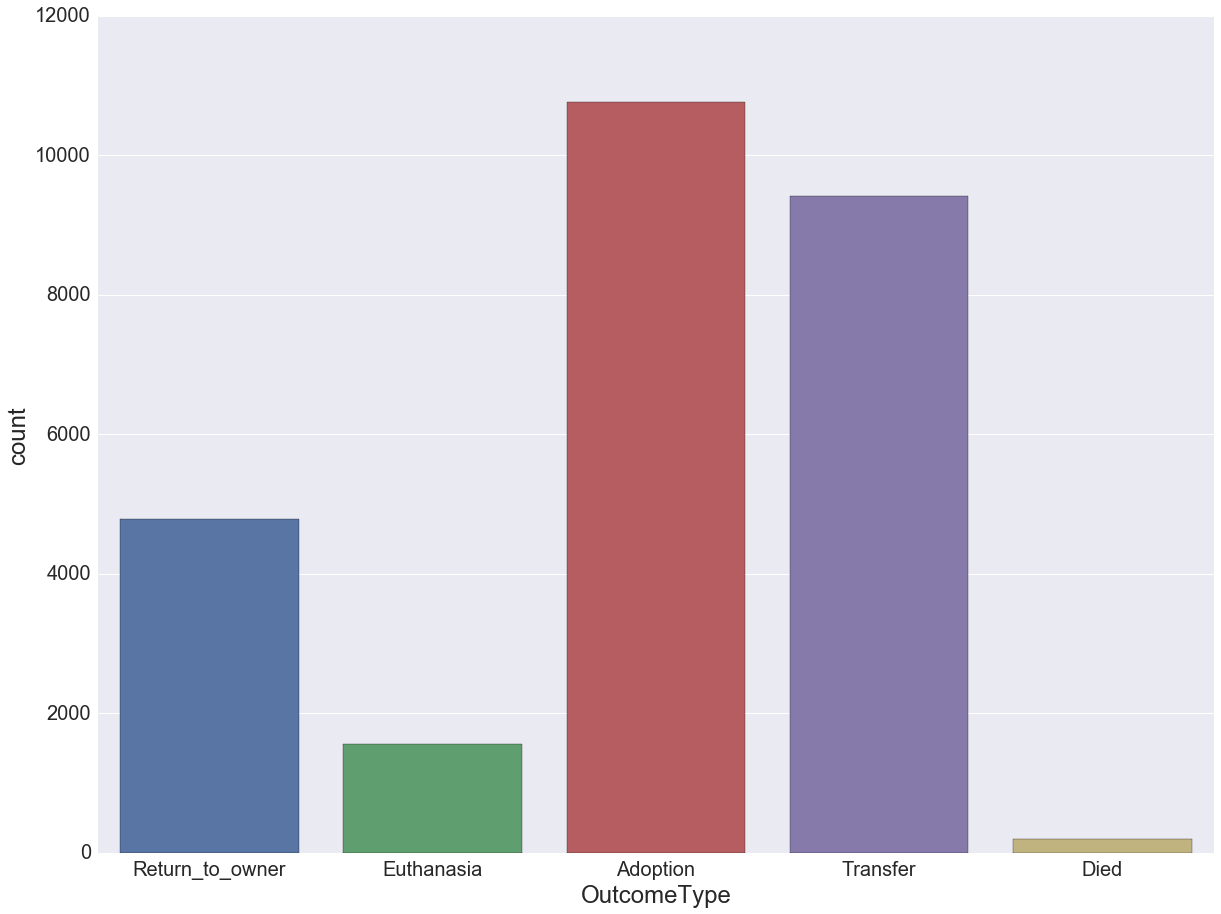

In [90]:
# # matplotlib barchart using train['OutcomeType'].value_counts()
# fig, ax = plt.subplots(figsize=(20, 15))
# ax.bar(xrange(0, 5), outcomes_counts.values, align='center')
# ax.set_xticklabels(outcomes_counts.index)
# ax = sns.barplot(x=outcomes_counts.index, y=outcomes_counts.values)

rc={'axes.labelsize': 24, 'font.size': 24, 'legend.fontsize': 14.0, 'axes.titlesize': 14}
plt.rcParams.update(**rc)

plt.figure(figsize=(20,15))
ax = sns.countplot(train['OutcomeType'])

In [610]:
# look at Names
print train['Name'].value_counts().head()
print "Percentage Name Nulls", train[train['Name'].isnull()].shape[0] / float(train.shape[0])

Max        136
Bella      135
Charlie    107
Daisy      106
Lucy        94
Name: Name, dtype: int64
Percentage Name Nulls 0.287739907965


In [116]:
train.groupby(['OutcomeType', 'OutcomeSubtype']).count()

AnimalID  Name  DateTime  AnimalType  \
OutcomeType OutcomeSubtype                                              
Adoption    Barn                        1     0         1           1   
            Foster                   1800  1542      1800        1800   
            Offsite                   165   132       165         165   
Died        At Vet                      4     3         4           4   
            Enroute                     8     1         8           8   
            In Foster                  52    29        52          52   
            In Kennel                 114    35       114         114   
            In Surgery                  3     2         3           3   
Euthanasia  Aggressive                320   278       320         320   
            Behavior                   86    74        86          86   
            Court/Investigation         6     6         6           6   
            Medical                    66    38        66          66   
            Rabies Risk                74    43        74          74   
            Suffering                1002   301      1002        1002   
Transfer    Barn                        1     1         1           1   
            Partner                  7816  4436      7816        7816   
            SCRP                     1599    58      1599        1599   

                                 SexuponOutcome  AgeuponOutcome  Breed  Color  
OutcomeType OutcomeSubtype                                                     
Adoption    Barn                              1               1      1      1  
            Foster                         1800            1800   1800   1800  
            Offsite                         165             165    165    165  
Died        At Vet                            4               4      4      4  
            Enroute                           8               8      8      8  
            In Foster                        52              52     52     52  
            In Kennel                       114             114    114    114  
            In Surgery                        3               3      3      3  
Euthanasia  Aggressive                      320             320    320    320  
            Behavior                         86              86     86     86  
            Court/Investigation               6               6      6      6  
            Medical                          66              66     66     66  
            Rabies Risk                      74              74     74     74  
            Suffering                      1002            1000   1002   1002  
Transfer    Barn                              1               1      1      1  
            Partner                        7816            7816   7816   7816  
            SCRP                           1599            1583   1599   1599

### Exploring sample_submission.csv to understand how to make a submission

In [17]:
sample.columns

Index([u'ID', u'Adoption', u'Died', u'Euthanasia', u'Return_to_owner',
       u'Transfer'],
      dtype='object')

# <center>Modeling</center>

## Preparing Data for Modeling

### Treat Nulls

In [521]:
transformed = train.copy()

In [522]:
for col in transformed.columns:
    uniques = transformed[col].unique()
    print col, len(uniques), uniques
    print

AnimalID 26729 ['A671945' 'A656520' 'A686464' ..., 'A698128' 'A677478' 'A706629']

Name 6375 ['Hambone' 'Emily' 'Pearce' ..., 'Mowmow' 'Sonja' 'Green Bean']

DateTime 22918 ['2014-02-12 18:22:00' '2013-10-13 12:44:00' '2015-01-31 12:28:00' ...,
 '2015-05-14 11:56:00' '2015-03-09 13:33:00' '2014-04-27 12:22:00']

OutcomeType 5 ['Return_to_owner' 'Euthanasia' 'Adoption' 'Transfer' 'Died']

OutcomeSubtype 17 [nan 'Suffering' 'Foster' 'Partner' 'Offsite' 'SCRP' 'Aggressive'
 'Behavior' 'Rabies Risk' 'Medical' 'In Kennel' 'In Foster' 'Barn'
 'Court/Investigation' 'Enroute' 'At Vet' 'In Surgery']

AnimalType 2 ['Dog' 'Cat']

SexuponOutcome 6 ['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]

AgeuponOutcome 45 ['1 year' '2 years' '3 weeks' '1 month' '5 months' '4 years' '3 months'
 '2 weeks' '2 months' '10 months' '6 months' '5 years' '7 years' '3 years'
 '4 months' '12 years' '9 years' '6 years' '1 weeks' '11 years' '4 weeks'
 '7 months' '8 years' '11 months' '4 

In [525]:
# which columns have nulls?
np.sum(transformed.isnull())

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [526]:
# quick view of obs with no names
transformed[transformed['Name'].isnull()].head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White
10,A668402,NaN,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black


In [527]:
# fill in no names with "noName"
transformed['Name'] = transformed['Name'].fillna(value="noName")

In [528]:
# check no nulls remaining in Name
transformed[transformed['Name'].isnull()].count()

AnimalID          0
Name              0
DateTime          0
OutcomeType       0
OutcomeSubtype    0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

In [529]:
# check if no names have been filled
transformed[transformed['Name'] == 'noName']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3,A683430,noName,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,noName,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
7,A701489,noName,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
9,A677747,noName,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White
10,A668402,noName,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black
11,A666320,noName,2013-11-04 14:48:00,Adoption,NaN,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver
16,A678050,noName,2014-05-03 16:15:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Brown Tabby
17,A680028,noName,2014-06-07 12:54:00,Transfer,Partner,Dog,Intact Female,2 weeks,Pit Bull Mix,Brown/White
30,A718535,noName,2016-01-01 13:57:00,Euthanasia,Suffering,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico
32,A682532,noName,2014-07-03 17:01:00,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Torbie


In [530]:
# check remaining columns with null
np.sum(transformed.isnull())

AnimalID              0
Name                  0
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [531]:
# which outcomes have null OutcomeSubtypes?`
transformed[transformed['OutcomeSubtype'].isnull()]['OutcomeType'].value_counts()

Adoption           8803
Return_to_owner    4786
Died                 16
Transfer              6
Euthanasia            1
Name: OutcomeType, dtype: int64

In [532]:
# quick view of null OutcomeSubtypes
transformed[transformed['OutcomeSubtype'].isnull()].head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
11,A666320,noName,2013-11-04 14:48:00,Adoption,NaN,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver
13,A704702,Scooter,2015-06-08 16:30:00,Return_to_owner,NaN,Dog,Neutered Male,2 years,Yorkshire Terrier Mix,Black/Red
14,A688584,Preston,2015-11-25 15:00:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Great Pyrenees Mix,White/Cream


In [533]:
# replace null OutcomeSubtype with "noSubOutcome"
transformed['OutcomeSubtype'].fillna(value="noSubOutcome", inplace=True)

In [534]:
# check any nulls remain in OutcomeSubtype
transformed[transformed['OutcomeSubtype'].isnull()].count()

AnimalID          0
Name              0
DateTime          0
OutcomeType       0
OutcomeSubtype    0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

In [535]:
# check OutcomeSubtype nulls have been filled
transformed[transformed['OutcomeSubtype'] == 'noSubOutcome'].head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,noSubOutcome,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,noSubOutcome,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
11,A666320,noName,2013-11-04 14:48:00,Adoption,noSubOutcome,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver
13,A704702,Scooter,2015-06-08 16:30:00,Return_to_owner,noSubOutcome,Dog,Neutered Male,2 years,Yorkshire Terrier Mix,Black/Red
14,A688584,Preston,2015-11-25 15:00:00,Return_to_owner,noSubOutcome,Dog,Neutered Male,1 year,Great Pyrenees Mix,White/Cream


In [538]:
# check remaining columns with nulls
np.sum(transformed.isnull())

AnimalID           0
Name               0
DateTime           0
OutcomeType        0
OutcomeSubtype     0
AnimalType         0
SexuponOutcome     1
AgeuponOutcome    18
Breed              0
Color              0
dtype: int64

In [539]:
# quick view of null AgeuponOutcome
transformed[transformed['AgeuponOutcome'].isnull()].head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
2480,A720674,noName,2016-02-16 10:17:00,Transfer,SCRP,Cat,Intact Male,NaN,Domestic Shorthair Mix,Blue Tabby/White
2912,A720973,noName,2016-02-18 19:07:00,Transfer,SCRP,Cat,Unknown,NaN,Domestic Shorthair Mix,Gray Tabby
3766,A720820,noName,2016-02-16 18:55:00,Transfer,SCRP,Cat,Intact Female,NaN,Domestic Shorthair Mix,Brown Tabby
3875,A721076,noName,2016-02-20 16:37:00,Euthanasia,Suffering,Dog,Intact Male,NaN,Toy Poodle Mix,White
4498,A720422,noName,2016-02-09 19:43:00,Transfer,SCRP,Cat,Intact Female,NaN,Domestic Shorthair Mix,Brown Tabby


In [540]:
# AgeuponOutcome nulls represent only 0.067% of the data
transformed[transformed['AgeuponOutcome'].isnull()].shape[0] / float(transformed.shape[0])

0.0006734258670358038

In [541]:
# dropping nulls from AgeuponOutcome
transformed.dropna(subset=['AgeuponOutcome'], inplace=True)

In [542]:
# check AgeuponOutcome are dropped
transformed[transformed['AgeuponOutcome'].isnull()].count()

AnimalID          0
Name              0
DateTime          0
OutcomeType       0
OutcomeSubtype    0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

In [543]:
# "0 years" seems like an odd value for AgeuponOutcome. 
# "0 years" only represents 0.082% of the data; dropping "0 values from AgeuponOutcome

transformed[transformed['AgeuponOutcome'] == '0 years'].shape[0] / float(transformed.shape[0])

0.0008236307139380779

In [544]:
# retaining all AgeuponOutcome except "0 year"
transformed = transformed[transformed['AgeuponOutcome'] != '0 years']

In [545]:
# check "0 years" has been dropped from AgeuponOutcome
transformed[transformed['AgeuponOutcome'] == '0 years'].shape[0]

0

In [546]:
# check reamining columns w/ nulls
np.sum(transformed.isnull())

AnimalID          0
Name              0
DateTime          0
OutcomeType       0
OutcomeSubtype    0
AnimalType        0
SexuponOutcome    1
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

In [492]:
# SexuponOUtcome has one null and 'Unknown'
transformed[(pd.isnull(transformed['SexuponOutcome'])) | (transformed['SexuponOutcome'] == 'Unknown')]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
7,A701489,noName,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,A668402,noName,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black
64,A683961,noName,2014-07-17 17:31:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Black
68,A705258,noName,2015-06-16 09:00:00,Transfer,SCRP,Cat,Unknown,2 months,Domestic Shorthair Mix,Brown Tabby/White
81,A712376,noName,2015-09-22 12:10:00,Euthanasia,Suffering,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Blue Tabby
82,A703952,Taco,2015-05-30 18:56:00,Transfer,Partner,Cat,Unknown,4 weeks,Siamese Mix,Seal Point
103,A708351,noName,2015-07-26 14:40:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Black
138,A714177,noName,2015-10-20 09:00:00,Transfer,SCRP,Cat,Unknown,3 months,Domestic Shorthair Mix,Tortie
200,A671105,noName,2014-01-21 15:20:00,Transfer,SCRP,Cat,Unknown,1 year,Domestic Longhair Mix,Black
268,A710380,noName,2015-08-22 15:44:00,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Brown Tabby


In [547]:
transformed['SexuponOutcome'] = transformed['SexuponOutcome'].fillna(value='Unknown')

In [548]:
# check no remanining null in SexuponOutcome and any other column
transformed[transformed.isnull()].count()

AnimalID          0
Name              0
DateTime          0
OutcomeType       0
OutcomeSubtype    0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

In [549]:
# transformed.isnull()

print np.any(transformed.isnull())
print np.any(train.isnull())

False
True


In [498]:
# print list(train.columns[np.sum(train.isnull()) > 0])

# np.sum(train.isnull()) > 0

for col in transformed.columns:
    if sum(transformed[col].isnull()) == 0:
        print "%s contains %d nulls" %(col, sum(transformed[col].isnull()))

AnimalID contains 0 nulls
Name contains 0 nulls
DateTime contains 0 nulls
OutcomeType contains 0 nulls
OutcomeSubtype contains 0 nulls
AnimalType contains 0 nulls
SexuponOutcome contains 0 nulls
AgeuponOutcome contains 0 nulls
Breed contains 0 nulls
Color contains 0 nulls


In [575]:
# treat nulls pipeline

def treat_nulls(df):
    transformed = df.copy()
    transformed['Name'] = transformed['Name'].fillna(value="noName")
    transformed['OutcomeSubtype'] = transformed['OutcomeSubtype'].fillna(value="noSubOutcome")
    transformed = transformed.dropna(subset=['AgeuponOutcome'])
    transformed = transformed[transformed['AgeuponOutcome'] != '0 years']
    transformed['SexuponOutcome'] = transformed['SexuponOutcome'].fillna(value='Unknown')
    
    if np.any(transformed.isnull()):
        for col in transformed.columns:
            if sum(transformed[col].isnull()) > 0:
                print "%s contains %d nulls" %(col, sum(transformedformed[col].isnull()))
    else:
        return transformed
#     return transformed

In [576]:
testing_treat_nulls = treat_nulls(train)

In [579]:
# testing if treat_null returns same as manual steps taken in this Treat Nulls section
print transformed.shape[0]
transformed.shape[0] == testing_treat_nulls.shape[0]

26689


True

### Feature Extraction

#### Extract Days from AgeuponOutcome

In [580]:
# check string structure of AgeuponOutcome
transformed['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '14 years', '3 days', '6 days', '5 days',
       '5 weeks', '2 days', '16 years', '1 day', '13 years', '17 years',
       '18 years', '19 years', '20 years'], dtype=object)

In [581]:
# extract days, the lowest common denominator, from AgeuponOutcome

def age_to_days(age_str):
#     print type(age_str)
    age_val = int(str(age_str).split()[0])
    
    if "day" in age_str or "days" in "age_str":
        return age_val
    elif "week" in age_str or "weeks" in "age_str":
        return age_val * 7
    elif "month" in age_str or "months" in "age_str":
        return age_val * 30
    elif "year" in age_str or "years" in "age_str":
        return age_val * 365
    else:
        return "unknownAge"

In [582]:
transformed['AgeuponOutcome'] = transformed['AgeuponOutcome'].apply(age_to_days)

In [583]:
# check unique values and datatype for AgeuponOutcome
print transformed['AgeuponOutcome'].unique()
print transformed['AgeuponOutcome'].dtype

[ 365  730   21   30  150 1460   90   14   60  300  180 1825 2555 1095  120
 4380 3285 2190    7 4015   28  210 2920  330    4  270  240 5475 3650 5110
    3    6    5   35    2 5840    1 4745 6205 6570 6935 7300]
int64


In [584]:
transformed.describe(include="all")

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26689,26689,26689,26689,26689,26689,26689,26689.000000,26689,26689
unique,26689,6375,22892,5,17,2,5,NaN,1380,365
top,A705677,noName,2015-08-11 00:00:00,Adoption,noSubOutcome,Dog,Neutered Male,NaN,Domestic Shorthair Mix,Black/White
freq,1,7651,19,10769,13612,15587,9779,NaN,8780,2824
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,794.785380,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1083.036275,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095.000000,NaN,NaN


In [589]:
# convert "DateTime" to pandas.DateTime objects
transformed['DateTime'] = pd.to_datetime(transformed['DateTime'])

In [596]:
# create date features

transformed['DateTime'].apply(lambda dt: dt.dayofweek)
# transformed['DateTime'].apply(lambda dt: dt.day) # day of month
# transformed['DateTime'].apply(lambda dt: dt.month)
# transformed['DateTime'].apply(lambda dt: dt.dayofyear)

0        2
1        6
2        5
3        4
4        4
5        4
6        5
7        3
8        1
9        5
10       3
11       0
12       2
13       0
14       2
15       5
16       5
17       5
18       5
19       2
20       6
21       4
22       5
23       0
24       2
25       5
26       4
27       2
28       5
29       3
        ..
26699    0
26700    0
26701    6
26702    6
26703    4
26704    1
26705    5
26706    6
26707    1
26708    2
26709    5
26710    0
26711    2
26712    0
26713    0
26714    5
26715    2
26716    5
26717    0
26718    1
26719    0
26720    5
26721    3
26722    6
26723    4
26724    3
26725    2
26726    0
26727    6
26728    3
Name: DateTime, dtype: int64

NameError: name 'transformed' is not defined

### Encode Labels

In [97]:
from sklearn import preprocessing

In [98]:
le = preprocessing.LabelEncoder()

In [99]:
le.fit(transformed['OutcomeType'])

LabelEncoder()

In [100]:
le.classes_

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], dtype=object)

In [104]:
labels = le.transform(transformed['OutcomeType'])

In [105]:
train['OutcomeType'] = labels

In [123]:
np.sum(train.isnull()) / train.count()

AnimalID          0.000000
Name              0.403982
DateTime          0.000000
OutcomeType       0.000000
OutcomeSubtype    1.037737
AnimalType        0.000000
SexuponOutcome    0.000037
AgeuponOutcome    0.000674
Breed             0.000000
Color             0.000000
dtype: float64

In [124]:
train[train['Name'].isnull()]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White
10,A668402,NaN,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black
11,A666320,NaN,2013-11-04 14:48:00,Adoption,NaN,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver
16,A678050,NaN,2014-05-03 16:15:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Brown Tabby
17,A680028,NaN,2014-06-07 12:54:00,Transfer,Partner,Dog,Intact Female,2 weeks,Pit Bull Mix,Brown/White
30,A718535,NaN,2016-01-01 13:57:00,Euthanasia,Suffering,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico
32,A682532,NaN,2014-07-03 17:01:00,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Torbie


### Save Oversampling After Seeing Recall

In [ ]:
def oversample(X, y, target):
    """
    INPUT:
    X, y - your data
    target - the percentage of positive class 
             observations in the output
    OUTPUT:
    X_oversampled, y_oversampled - oversampled data
    `oversample` randomly replicates positive observations
    in X, y to achieve the target proportion
    """
    if target < sum(y)/float(len(y)):
        return X, y
    # determine how many new positive observations to generate
    positive_count = sum(y)
    negative_count = len(y) - positive_count
    target_positive_count = target*negative_count / (1. - target)
    target_positive_count = int(round(target_positive_count))
    number_of_new_observations = target_positive_count - positive_count
    # randomly generate new positive observations
    positive_obs_indices = np.where(y==1)[0] # np.where returns a tuple containing an array of indices
    new_obs_indices = np.random.choice(positive_obs_indices, 
                                       size=number_of_new_observations, 
                                       replace=True)
    X_new, y_new = X[new_obs_indices], y[new_obs_indices]
    X_positive = np.vstack((X[positive_obs_indices], X_new))
    y_positive = np.concatenate((y[positive_obs_indices], y_new))
    X_negative = X[y==0]
    y_negative = y[y==0]
    X_oversampled = np.vstack((X_negative, X_positive))
    y_oversampled = np.concatenate((y_negative, y_positive))

    return X_oversampled, y_oversampled